# Исследование объявлений о продаже квартир

Проведение исследовательского анализа по данным из архива объявлений о продаже квартир в Санкт-Петербурге 

## Шаг 1. Общая информация

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
display(data.head())
data.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

В таблице представлено 22 столбца и 23699 строк, при изучении информации видны многочисленные пропуски в данных, часть из них целесообразно будет заполнить.

## Шаг 2. Предобработка данных

In [3]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [4]:
print(data.isnull().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


In [5]:
print(data.duplicated().sum())

0


In [6]:
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())
data['balcony'] = data['balcony'].fillna(0)
data['is_apartment'] = data['is_apartment'].fillna('False')
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
living = data['living_area'].median() / data['total_area'].median()
kitchen = data['kitchen_area'].median() / data['total_area'].median()
def kitchen_area(data):
    if math.isnan(data.at['kitchen_area']):
        return data['total_area'] * kitchen
    return data['kitchen_area']
data['kitchen_area'] = data.apply(kitchen_area, axis = 1)
def living_area(data):
    if math.isnan(data.at['living_area']):
        return data['total_area'] * living
    return data['living_area']
data['living_area'] = data.apply(living_area, axis = 1) 

In [7]:
data['floors_total'] = data['floors_total'].astype('int64')
data['is_apartment'] = data['is_apartment'].astype('bool')
data['balcony'] = data['balcony'].astype('int64')
data['parks_around3000'] = data['parks_around3000'].astype('int64')
data['ponds_around3000'] = data['ponds_around3000'].astype('int64')

In [8]:
print(data['is_apartment'].unique())
print(data.info())

[ True False]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null int64
parks_nearest           8079 non-null float64
ponds_ar

### Вывод

При анализе значений столбцов выявлены немногочисленные выбросы значений. Пропуска были заменены в столбцах, где под пропуском скорее всего принималось отсутсвие заданного параметра (балконы, парки, озера, апартамент), заменены пропуски в столбце floors_total, т.к. в дальнейшем для анализа понадобятся расчеты, с указанием данного столбца. Также были добавлены значения в столбцы с жилой площадью и площадью кухни. Значения в столбце с высотой потолков не были заменены, т.к., по моему мнению, их довольно много в случае их замены на медианное значение, результаты исследования будут сильно искажены. Заменен тип данных в столбцах, где, по определению, должно быть целочисленное значение, а также тип данных в столбце is_apartment, где непропущенные значения соответствовали типу данных bool.

## Шаг 3. Расчет дополнительных параметров

In [9]:
data['meter_price'] = data['last_price'] / data['total_area']
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format ='%Y-%m-%dT%H:%M:%S')
data['day of week_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).round()
data['total_area_int'] = data['total_area'].astype('int64')
def floor_group(data):
    if data['floor'] == data['floors_total']:
        return 'последний'
    if data['floor'] == 1:
        return 'первый'
    return 'другой'
data['floor_group'] = data.apply(floor_group, axis = 1)
print(data['floor_group'].head())
data['living_part'] = data['living_area'] / data['total_area']
data['kitchen_part'] = data['kitchen_area'] / data['total_area']
print(data[['kitchen_part', 'living_part', 'meter_price']].head())

0    другой
1    первый
2    другой
3    другой
4    другой
Name: floor_group, dtype: object
   kitchen_part  living_part    meter_price
0      0.231481     0.472222  120370.370370
1      0.272277     0.460396   82920.792079
2      0.148214     0.612500   92785.714286
3      0.175000     0.576923  408176.100629
4      0.410000     0.320000  100000.000000


### Вывод

Требуемые значение были рассчитаны и добавлены в таблицу.

## Шаг 4. Проведение исследовательского аналзиа данных:

In [10]:
data[['total_area', 'last_price', 'rooms','ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23699.000000,2.369900e+04,23699.000000,14504.000000
mean,60.348651,6.541549e+06,2.070636,2.771499
std,35.654083,1.088701e+07,1.078405,1.261056
min,12.000000,1.219000e+04,0.000000,1.000000
25%,40.000000,3.400000e+06,1.000000,2.520000
50%,52.000000,4.650000e+06,2.000000,2.650000
75%,69.900000,6.800000e+06,3.000000,2.800000
max,900.000000,7.630000e+08,19.000000,100.000000


In [11]:
def hist(data, column, bins, range):
    return data.hist(column, bins = bins, range = range)

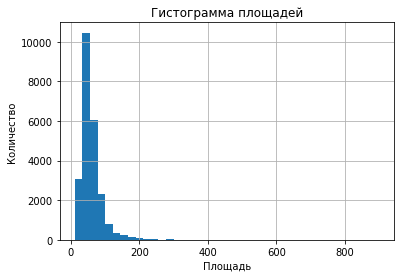

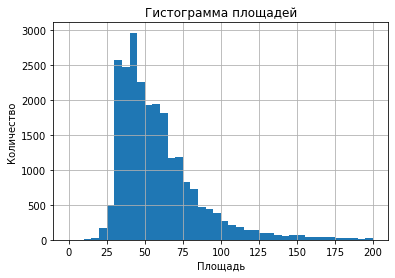

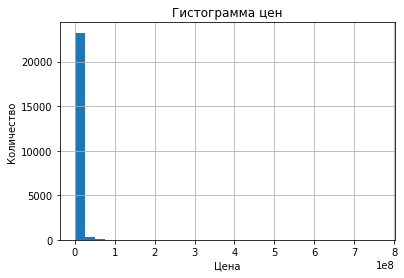

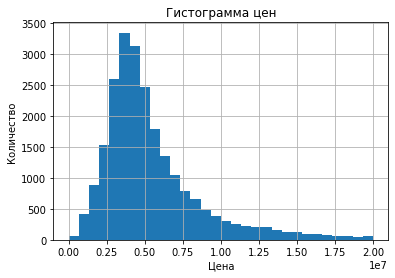

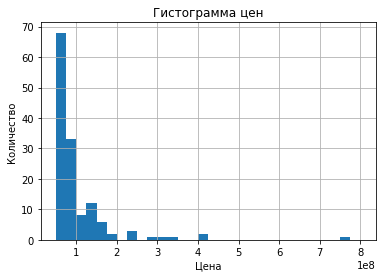

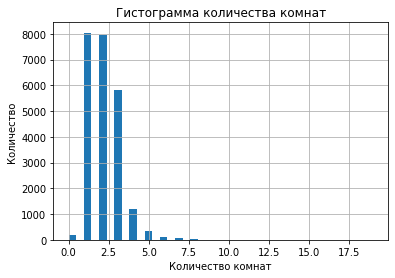

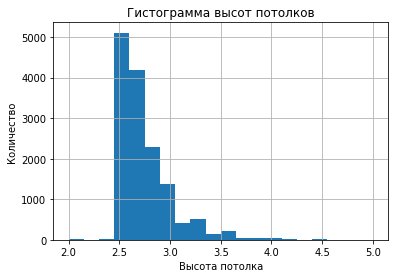

In [12]:
hist(data, 'total_area', 40, None)
plt.title('Гистограмма площадей')
plt.xlabel('Площадь')
plt.ylabel('Количество')
hist(data, 'total_area', 40, (0,200))
plt.title('Гистограмма площадей')
plt.xlabel('Площадь')
plt.ylabel('Количество')
hist(data, 'last_price', 30, None)
plt.title('Гистограмма цен')
plt.xlabel('Цена')
plt.ylabel('Количество')
hist(data, 'last_price', 30, (0, 20000000))
plt.title('Гистограмма цен')
plt.xlabel('Цена')
plt.ylabel('Количество')
hist(data, 'last_price', 30, (50000000, 800000000))
plt.title('Гистограмма цен')
plt.xlabel('Цена')
plt.ylabel('Количество')
hist(data, 'rooms', 40, None)
plt.title('Гистограмма количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество')
hist(data, 'ceiling_height', 20, (2,5))
plt.title('Гистограмма высот потолков')
plt.xlabel('Высота потолка')
plt.ylabel('Количество')
plt.show()

In [13]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

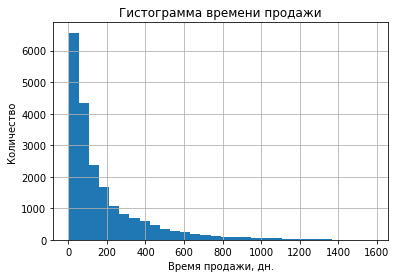

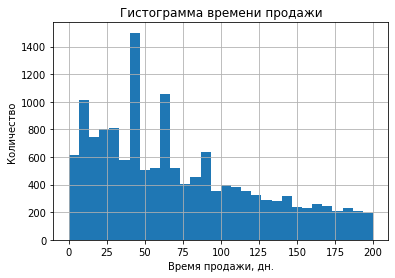

In [14]:
hist(data,'days_exposition', 30, None)
plt.title('Гистограмма времени продажи')
plt.xlabel('Время продажи, дн.')
plt.ylabel('Количество')
hist(data,'days_exposition', 30, (0,200))
plt.title('Гистограмма времени продажи')
plt.xlabel('Время продажи, дн.')
plt.ylabel('Количество')
plt.show()

### Вывод

В ходе анализа были обнаружены выбивающиеся значения. Из-за этого по построенным гистограммам сложно сделать выводы. Также по ним примерно можно оценить в каких диапазонах будет значений будет удобно рассмотреть распределения по заданным параметрам. При рассмотрении столбца days_exposition, видно что количество измерений со временем продажи больше года немногочисленны и можно принять их за необычно долгие продажи. За время обычной продажи можно считать время, ограниченное 8 месяцами, что примерно соответствует 3 квартилю. Быстрыми продажами модно считать продажи, ограниченные 1 месяцем, хотя количество таких значений довольно большое.

In [15]:
data_filtr = data.query('total_area <=200 and last_price <= 3e+7 and last_price >= 1e+6 and rooms >0 and rooms <=7 and not ceiling_height <= 2.4 and not ceiling_height >=5 and days_exposition <= 365')
print(data_filtr.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16858 entries, 1 to 23695
Data columns (total 31 columns):
total_images              16858 non-null int64
last_price                16858 non-null float64
total_area                16858 non-null float64
first_day_exposition      16858 non-null datetime64[ns]
rooms                     16858 non-null int64
ceiling_height            9808 non-null float64
floors_total              16858 non-null int64
living_area               16858 non-null float64
floor                     16858 non-null int64
is_apartment              16858 non-null bool
studio                    16858 non-null bool
open_plan                 16858 non-null bool
kitchen_area              16858 non-null float64
balcony                   16858 non-null int64
locality_name             16820 non-null object
airports_nearest          13103 non-null float64
cityCenters_nearest       13121 non-null float64
parks_around3000          16858 non-null int64
parks_nearest            

In [16]:
data_filtr[['total_area', 'last_price', 'rooms', 'ceiling_height', 'days_exposition']].describe()

,total_area,last_price,rooms,ceiling_height,days_exposition
count,16858.000000,1.685800e+04,16858.000000,9808.000000,16858.000000
mean,55.537616,5.393693e+06,1.969332,2.700598,104.724345
std,23.118149,3.428540e+06,0.932978,0.240180,89.343239
min,12.000000,1.000000e+06,1.000000,2.450000,1.000000
25%,39.200000,3.400000e+06,1.000000,2.500000,37.000000
50%,50.000000,4.500000e+06,2.000000,2.650000,74.000000
75%,65.300000,6.250000e+06,3.000000,2.760000,154.000000
max,200.000000,3.000000e+07,7.000000,4.800000,364.000000


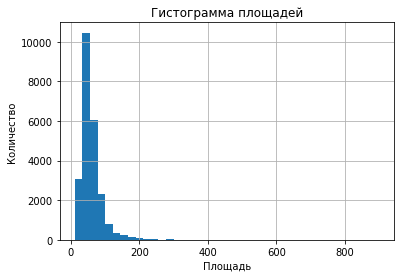

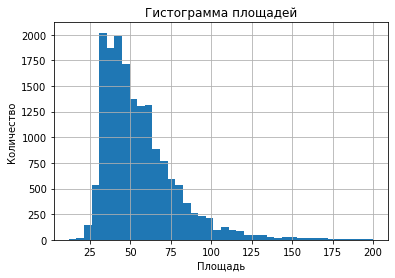

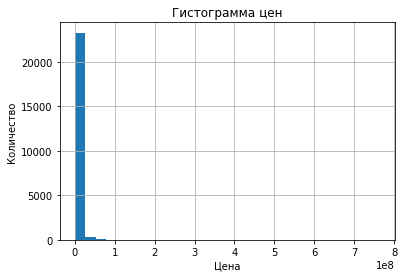

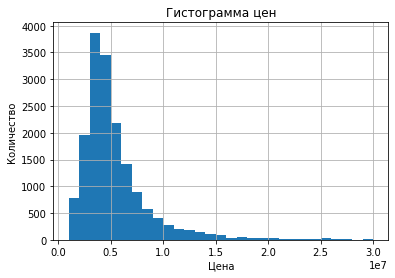

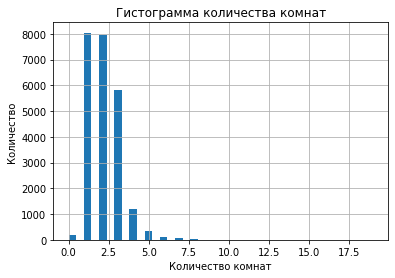

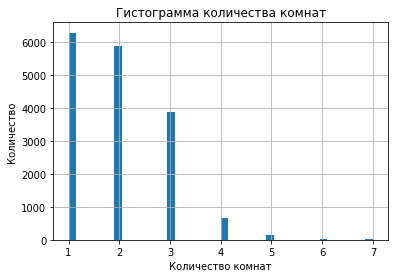

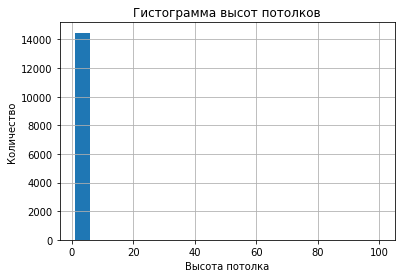

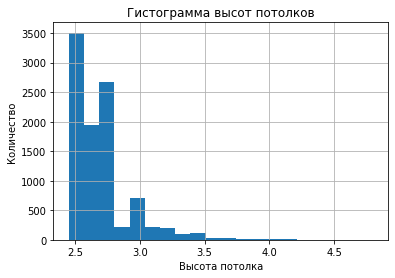

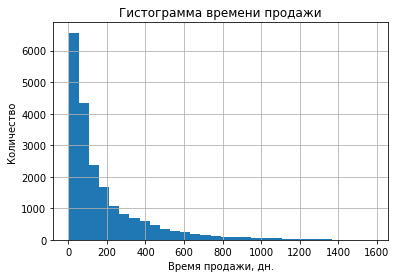

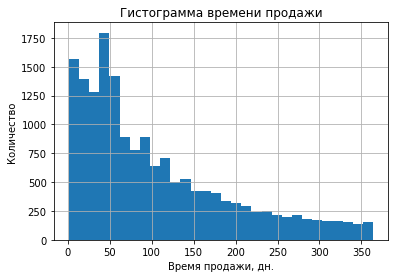

In [17]:
hist(data, 'total_area', 40, None)
plt.title('Гистограмма площадей')
plt.xlabel('Площадь')
plt.ylabel('Количество')
hist(data_filtr, 'total_area', 40, None)
plt.title('Гистограмма площадей')
plt.xlabel('Площадь')
plt.ylabel('Количество')
hist(data, 'last_price', 29, None)
plt.title('Гистограмма цен')
plt.xlabel('Цена')
plt.ylabel('Количество')
hist(data_filtr, 'last_price', 29, None)
plt.title('Гистограмма цен')
plt.xlabel('Цена')
plt.ylabel('Количество')
hist(data, 'rooms', 40, None)
plt.title('Гистограмма количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество')
hist(data_filtr, 'rooms', 40, None)
plt.title('Гистограмма количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество')
hist(data, 'ceiling_height', 20,None)
plt.title('Гистограмма высот потолков')
plt.xlabel('Высота потолка')
plt.ylabel('Количество')
hist(data_filtr, 'ceiling_height', 20, None)
plt.title('Гистограмма высот потолков')
plt.xlabel('Высота потолка')
plt.ylabel('Количество')
hist(data, 'days_exposition', 30, None)
plt.title('Гистограмма времени продажи')
plt.xlabel('Время продажи, дн.')
plt.ylabel('Количество')
hist(data_filtr,'days_exposition', 30, None)
plt.title('Гистограмма времени продажи')
plt.xlabel('Время продажи, дн.')
plt.ylabel('Количество')
plt.show()

### Вывод
По распределению квартир по площадям можно сделать вывод о том, что большая часть квартир лежит в диапазоне площадей от 30 до 70, что соответствует ожидаемому. После удаления редких значений можно увидеть, что значения квартилей претерпели минимальные изменения, что свидетельствует о том что удаление не оказало сильное влияние на исследование. Значения площади больше 200 не считаю ошибкой, т.к. встречаются и квартиры таковых площадей.

### Вывод
В ценовом распределении видно, что большая часть квартир расположена в ценовом дапазоне 3-6 млн, что также является ожидаемым. После удаления выбивающихся значений, можно заметить что квартили практически не изменились, а среднее значение снизилось. Квартиры дешевле 1 млн, убранные из исследования считаю весьма маловероятными, квартиры дороже 30 млн встречаются, но довольно редко и слишком большие цены оказывают влияние на распредение, так что счел нужным их удалить.

### Вывод
Наиболее часто встречаются квартиры с 1,2 или 3 комнатами, что также ожидаемо, были убраны значения больше 7, т.к. встречаются слишком редко, и значение 0, что является ошибкой.

### Вывод
Большая часть значений лежит в диапазоне от 2,5 до 2,9 м. Сложно понятным является большое количество квартир с высотой потолков от 3 до 3,1 м, что нарушает распреление по высоте. Значения высоты меньше 2м и больше 7м скорее всего являются ошибочными, а значения от 5 до 7 м практически не встречаются, и поэтому также были удалены.

### Вывод
При рассмотрении распредения по времени продажи, виден тренд на снижение после значения в 2 месяца, что является логичным, удаление слишком больших значений позволило увидить что число объявлений, убранных в первый и второй месяца примерно одинаково, что означает что можно выделить данное время как обычное для продажи.

0.7740430674969987


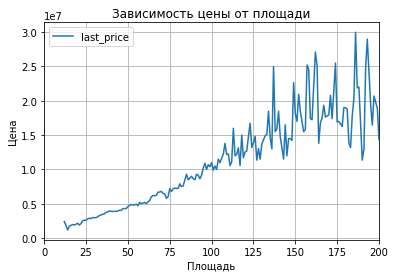

In [18]:
data_area = data_filtr.pivot_table(index = 'total_area_int', values = 'last_price', aggfunc ='median')
data_area.plot(xlim = (0,200), grid = True)
plt.title('Зависимость цены от площади')
plt.xlabel('Площадь')
plt.ylabel('Цена')
print(data_filtr['total_area'].corr(data_filtr['last_price']))

### Вывод
Представлена зависимость цены от площади. Данная зависимость является cbkmyjq, что и демонстрирует коэффициент корреляции 0,78. При больших площадях зависимость немного искажается, т.к. другие факторы влияющие на цену начинают оказывать более сильное влияние, чем на квартиры меньших площадей.

0.4866133108298084


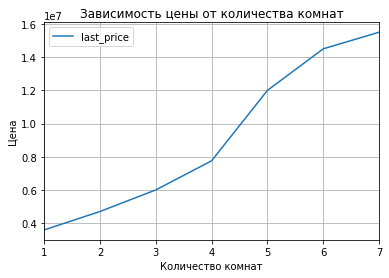

In [19]:
data_rooms = data_filtr.pivot_table(index = 'rooms', values = 'last_price', aggfunc ='median')
data_rooms.plot(xlim = (1,7), grid = True)
plt.title('Зависимость цены от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Цена')
print(data_filtr['rooms'].corr(data_filtr['last_price']))

### Вывод
Зависимость цены от количества комнат менее очевидна, т.к. количество комнат не является основным фактором, оказывающим влияние на цену, фактор сохраняется из-за того что число комнат в какой-то степени коррелирует с площадью квартиры. При количестве комнат больше 5, влияние этого параметра практически обнуляется, т.к. при больших площадях все чаще встречаются свободные планировки и количество комнат там может проставляться произвольно.

-0.3374584568018209


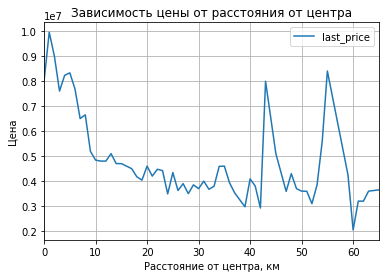

In [20]:
data_km = data_filtr.pivot_table(values = 'last_price', index = 'cityCenters_nearest_km', aggfunc ='median')
data_km.plot(grid = True)
plt.title('Зависимость цены от расстояния от центра')
plt.xlabel('Расстояние от центра, км')
plt.ylabel('Цена')
print(data_filtr['cityCenters_nearest'].corr(data_filtr['last_price']))

### Вывод
Данная зависимость совсем не похожа на линейную, т.к. имеется несколько пиков, скорее всего представляющие собой центры разных городов. В то же время та часть, которая не соответствует предполагаемым центрам показывает снижение цены при удалении от центра.

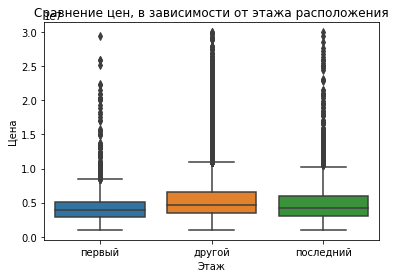

In [21]:
sns.boxplot(x = 'floor_group', y = 'last_price', data = data_filtr)
plt.title('Сравнение цен, в зависимости от этажа расположения')
plt.xlabel('Этаж')
plt.ylabel('Цена')
plt.show()

### Вывод
По данным зависимостям видно, что квартиры на первом этаже, в целом дешевле, чем на других, это соответствует истине. Медианное значение цены квартир на последнем этаже немного ниже, в целом бывают случаи когда цена на последнем этаже меньше, чем на более нижних, но они наблюдаются не всегда.

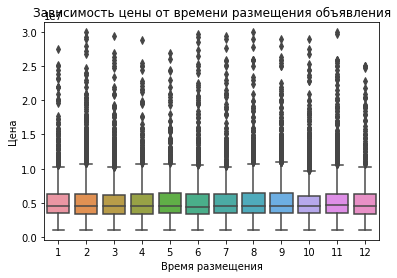

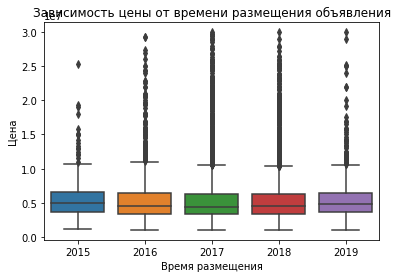

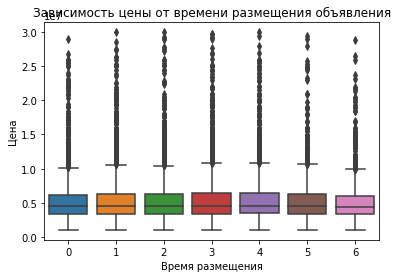

In [22]:
for i in data_filtr[['month_exposition', 'year_exposition', 'day of week_exposition']]:
    sns.boxplot(x = i, y = 'last_price', data = data_filtr)
    plt.title('Зависимость цены от времени размещения объявления')
    plt.xlabel('Время размещения')
    plt.ylabel('Цена')
    plt.show()

### Вывод
В зависимости по дням недели и месяцам оказываемое влияние не велико, я не вижу какой-то определенной зависимости. В зависимости от года выделяется 2014, с гораздо большей медианой и 3 квартилем, возможно это объясняется меньшим числом измерений. Также есть некоторая зависимость по снижению цены с 2014 по 2018 годы, с повышением в 2019.

In [23]:
data_filtr['locality_name'].value_counts().head(10)

Санкт-Петербург      11230
посёлок Мурино         438
посёлок Шушары         359
Всеволожск             282
Колпино                273
посёлок Парголово      259
Пушкин                 258
деревня Кудрово        244
Гатчина                219
Выборг                 174
Name: locality_name, dtype: int64

In [24]:
data_locality = data_filtr.query('locality_name in ("Санкт-Петербург", "посёлок Мурино", "посёлок Шушары", "Всеволожск", "Пушкин", "Колпино", "посёлок Парголово", "Гатчина", "деревня Кудрово", "Выборг")')
print(data_locality.groupby('locality_name')['meter_price'].mean().sort_values(ascending = False))

locality_name
Санкт-Петербург      108072.683069
Пушкин               101562.136990
деревня Кудрово       92447.233105
посёлок Парголово     89241.011192
посёлок Мурино        85503.356393
посёлок Шушары        77957.205806
Колпино               74524.773783
Всеволожск            69242.121696
Гатчина               68485.187133
Выборг                57759.875698
Name: meter_price, dtype: float64


### Вывод

Выделены 10 поселений, очевидно что наивысшая средняя цена в самом Петербурге, следующим является город Пушкин, высокие цены в нем объясняются как самим качеством города, так и его близостью к центру. Следующие 5 поселений, фактически являются пригородами Санкт-Петербурга, цены в них отличаются друг от друга из-за разных факторов. Последние 3 поселения находятся на удалении, среди них выделяется Выборг, который намного дальше от Петербурга, чем 2 остальных, что и показывает существенно болея низкая цена.

                          meter_price
cityCenters_nearest_km               
0.0                     113558.254980
1.0                     137096.130015
2.0                     128305.121225
3.0                     113496.714632
4.0                     122278.338347
5.0                     130700.008413
6.0                     130228.808546
7.0                     125631.423490
8.0                     119988.097629
9.0                     111072.281879
10.0                    110236.492591
11.0                    105381.473399
12.0                    106616.484762
13.0                    107045.756601
14.0                    102849.115192
15.0                    102033.096497
16.0                     98772.511812
17.0                     95707.591427
18.0                     95224.638495
19.0                     99542.744244
20.0                     97554.703166
21.0                     91021.900485
22.0                     90737.171754
23.0                     88934.570833
24.0        

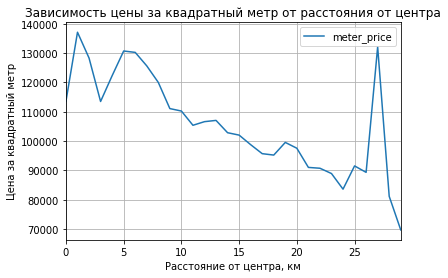

In [25]:
data_peterburg = data_filtr.query('locality_name in "Санкт-Петербург"')
peterburg_table = data_peterburg.pivot_table(values = 'meter_price', index = 'cityCenters_nearest_km', aggfunc ='mean')
print(peterburg_table)
peterburg_table.plot(grid=True)
plt.title('Зависимость цены за квадратный метр от расстояния от центра')
plt.xlabel('Расстояние от центра, км')
plt.ylabel('Цена за квадратный метр')
plt.show()

### Вывод

По итогам выделена центральная зона размером в 7 км, т.к. после этого наблюдается постоянное снижение (в отличие от 3 км)

In [26]:
data_centr = data_peterburg.query('cityCenters_nearest_km <= 7')
data_centr[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,2052.000000,2.052000e+03,2052.000000,1242.000000
mean,75.784883,9.436943e+06,2.539474,3.040072
std,32.323268,5.038278e+06,1.139213,0.342495
min,12.000000,1.600000e+06,1.000000,2.460000
25%,51.275000,6.000000e+06,2.000000,2.800000
50%,70.250000,8.000000e+06,2.000000,3.000000
75%,93.350000,1.150000e+07,3.000000,3.200000
max,197.000000,3.000000e+07,7.000000,4.800000


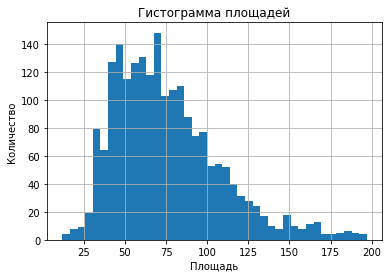

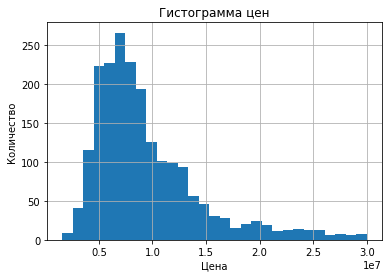

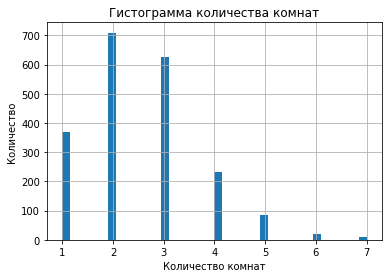

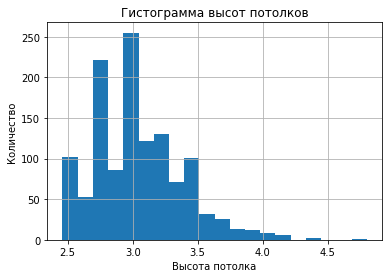

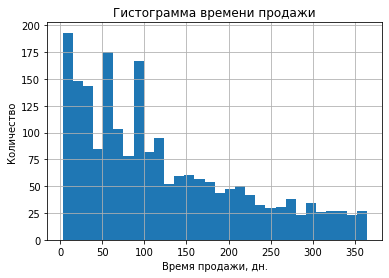

In [27]:
hist(data_centr, 'total_area', 40, None)
plt.title('Гистограмма площадей')
plt.xlabel('Площадь')
plt.ylabel('Количество')
hist(data_centr, 'last_price', 29, None)
plt.title('Гистограмма цен')
plt.xlabel('Цена')
plt.ylabel('Количество')
hist(data_centr, 'rooms', 40, None)
plt.title('Гистограмма количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество')
hist(data_centr, 'ceiling_height', 20, None)
plt.title('Гистограмма высот потолков')
plt.xlabel('Высота потолка')
plt.ylabel('Количество')
hist(data_centr, 'days_exposition', 30, None)
plt.title('Гистограмма времени продажи')
plt.xlabel('Время продажи, дн.')
plt.ylabel('Количество')
plt.show()

### Вывод
В сравнении со всем регионом обнаруживаются определенные особенности:
Увеличение всех параметров, в частности наиболее встречающиеся площади представлены в диапазоне от 40 до 100 квадратных метров и следующее за ним повышение среднего количества комнат, также наблюдается существенное повышение цен на квартиры. Также в центре у квартир в среднем более высокие потолки. 

0.7212616244342661


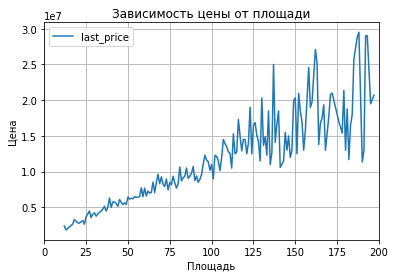

In [28]:
data_area_centr = data_centr.pivot_table(index = 'total_area_int', values = 'last_price', aggfunc ='median')
data_area_centr.plot(xlim = (0,200), grid = True)
plt.title('Зависимость цены от площади')
plt.xlabel('Площадь')
plt.ylabel('Цена')
print(data_centr['total_area'].corr(data_centr['last_price']))

### Вывод
В целом корелляция сохраняется, что доказывает зависимость цены от площади квартиры, отличием в этом случае является только что график расположен выше. То есть средний уровень цен поднялся.

0.43785659014829553


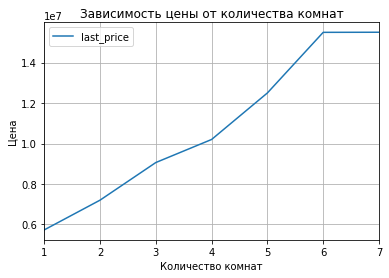

In [29]:
data_rooms_centr = data_centr.pivot_table(index = 'rooms', values = 'last_price', aggfunc ='median')
data_rooms_centr.plot(xlim = (1,7), grid = True)
plt.title('Зависимость цены от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Цена')
print(data_centr['rooms'].corr(data_centr['last_price']))

### Вывод
Выводы аналогичны предыдущему пункту.

-0.09932214915255233


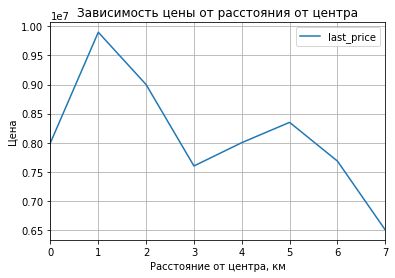

In [30]:
data_centr_km = data_centr.pivot_table(values = 'last_price', index = 'cityCenters_nearest_km', aggfunc ='median')
data_centr_km.plot(grid = True)
plt.title('Зависимость цены от расстояния от центра')
plt.xlabel('Расстояние от центра, км')
plt.ylabel('Цена')
print(data_centr['cityCenters_nearest_km'].corr(data_centr['last_price']))

### Вывод
В данном случае наблюдается снижение корреляции, в частности она почти равна нулю. Это можно объяснить тем, что рассматривается центральная зона, где зависимость от расстояния не оказывает особого воздействия на цену.

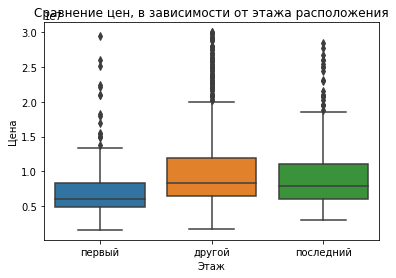

In [31]:
sns.boxplot(x = 'floor_group', y = 'last_price', data = data_centr)
plt.title('Сравнение цен, в зависимости от этажа расположения')
plt.xlabel('Этаж')
plt.ylabel('Цена')
plt.show()

### Вывод
В целом зависимость цен остается аналогичной, как и при анализе полных данных. Особенностью является более сильное отличие цен на первом этаже от цен на других этажах. Это может быть объяснено тем, что в центре города вопрос "является ли этаж первым" более важен, чем в пригородах.

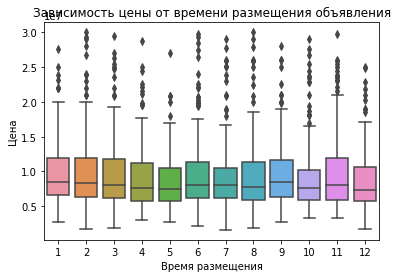

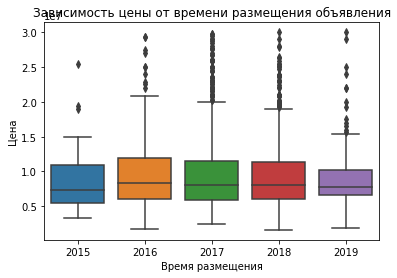

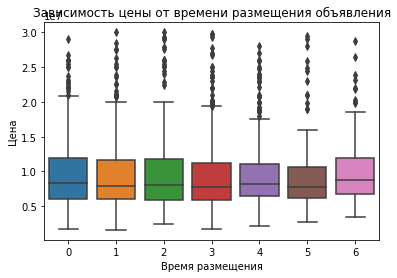

In [32]:
for i in data_filtr[['month_exposition', 'year_exposition', 'day of week_exposition']]:
    sns.boxplot(x = i, y = 'last_price', data = data_centr)
    plt.title('Зависимость цены от времени размещения объявления')
    plt.xlabel('Время размещения')
    plt.ylabel('Цена')
    plt.show()

### Вывод
В данном случае колебания цен в зависимости от дней и месяцев видны заметнее, наблюдается небольшое снижение цены в теплый период года, а также в конце недели. По зависимости от года выводы остаются такими же, только снижение в 2015-2018 годах наблюдается в меньшем размере.

## Шаг 5. Общий вывод

По итогам исследования можно сделать несколько выводов: большая часть объялений представляет из себя квартиры площадью 30-70 квадратных метров, с 1-3 комнатами, цены на них в среднем лежат в пределах 10 миллионов, более большие и дорогие квартиры представлены гораздо реже. При исследовании выявлены зависимости цены от площади, количества комнат, расстояния от центра и этажа квартиры. При сравнении всего города и центра, не смотря на общее повышение качества квартир ранее обнаруженные зависимости сохранились.